In [1]:
import numpy as np
import cv2
import os
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import keras.optimizers as optimizers
import keras
from keras import backend as K
import pickle
import matplotlib.pyplot as plt
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
%matplotlib inline

Using TensorFlow backend.


In [2]:
K.clear_session()

In [3]:
import tensorflow as tf
from keras.backend import tensorflow_backend

config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
session = tf.Session(config=config)
tensorflow_backend.set_session(session)

In [4]:
img_width, img_height = 200, 200
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
BATCH_SIZE = 64
EPOCHS = 200
STEPS = 10
CATEGORY = 8

In [5]:
category_names = [name for name in os.listdir(train_data_dir)]

In [6]:
category_names

['disgust',
 'happiness',
 'sadness',
 'surprised',
 'neutral',
 'angry',
 'contempt',
 'fear']

In [7]:
# モデルを作る
def inceptionV3fc_model():
    input_tensor = Input(shape=(img_height, img_width, 3))
    inceptionv3 = InceptionV3(include_top=False, weights='imagenet', input_tensor=input_tensor)
    
    # 全結合１
    top_model = Sequential()
    top_model.add(Flatten(input_shape=inceptionv3.output_shape[1:]))
    top_model.add(Dense(512, name="dense1"))
    top_model.add(Activation("relu"))
    top_model.add(Dropout(0.5))
        
    # 出力
    top_model.add(Dense(8, name='output'))
    top_model.add(Activation("softmax"))
    
    # 接続
    model = Model(inputs=inceptionv3.input, outputs=top_model(inceptionv3.output))
    
    # 元の特徴抽出部分は更新しない
#    for layer in model.layers[:249]:
#        layer.trainable = False
#    for layer in model.layers[249:]:
#        layer.trainable = True

    for layer in model.layers[:241]:
        layer.trainable = False
    for layer in model.layers[241:]:
        layer.trainable = True
        
        
#    for i, layer in enumerate(model.layers):
#        print(str(i) + ": " + layer.name)
    return model

In [8]:
model = inceptionV3fc_model()

In [9]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 200, 200, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 99, 99, 32)    864         input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 99, 99, 32)    96          conv2d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 99, 99, 32)    0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

In [10]:
model.compile(loss='categorical_crossentropy', 
              # optimizer='rmsprop',
              optimizer=optimizers.Adam(lr=0.0001),
#              optimizer=optimizers.SGD(),
              metrics=['accuracy'])

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=60,
#    zca_whitening=True,
#    samplewise_center=True,
#    featurewise_center=True,
    width_shift_range=0.1,
#    height_shift_range=0.2,
)

In [12]:
test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
#    color_mode="grayscale",
    shuffle=True,
    classes=category_names,
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=20,
    classes=category_names,
#    color_mode="grayscale",
)

Found 935 images belonging to 8 classes.
Found 160 images belonging to 8 classes.


In [14]:
history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS,
#    validation_data=validation_generator,
#    validation_steps=1
#    nb_val_samples=nb_validation_samples
)

Epoch 1/200
10/10 [==============================] - 7s - loss: 2.7391 - acc: 0.2156     
Epoch 2/200
10/10 [==============================] - 4s - loss: 1.9342 - acc: 0.2883     
Epoch 3/200
10/10 [==============================] - 4s - loss: 1.8230 - acc: 0.3365     
Epoch 4/200
10/10 [==============================] - 4s - loss: 1.7321 - acc: 0.3547     
Epoch 5/200
10/10 [==============================] - 4s - loss: 1.6505 - acc: 0.3979     
Epoch 6/200
10/10 [==============================] - 5s - loss: 1.6078 - acc: 0.4358     
Epoch 7/200
10/10 [==============================] - 5s - loss: 1.5288 - acc: 0.4391     
Epoch 8/200
10/10 [==============================] - 4s - loss: 1.4071 - acc: 0.5117     
Epoch 9/200
10/10 [==============================] - 4s - loss: 1.4531 - acc: 0.4670     
Epoch 10/200
10/10 [==============================] - 5s - loss: 1.3242 - acc: 0.5328     
Epoch 11/200
10/10 [==============================] - 4s - loss: 1.2905 - acc: 0.5532     
Epoch 12

10/10 [==============================] - 5s - loss: 0.1763 - acc: 0.9375     
Epoch 92/200
10/10 [==============================] - 4s - loss: 0.2406 - acc: 0.9183     
Epoch 93/200
10/10 [==============================] - 4s - loss: 0.1701 - acc: 0.9433     
Epoch 94/200
10/10 [==============================] - 5s - loss: 0.1843 - acc: 0.9422     
Epoch 95/200
10/10 [==============================] - 4s - loss: 0.1284 - acc: 0.9567     
Epoch 96/200
10/10 [==============================] - 4s - loss: 0.1235 - acc: 0.9565     
Epoch 97/200
10/10 [==============================] - 4s - loss: 0.1348 - acc: 0.9578     
Epoch 98/200
10/10 [==============================] - 5s - loss: 0.1073 - acc: 0.9630     
Epoch 99/200
10/10 [==============================] - 5s - loss: 0.1518 - acc: 0.9458     
Epoch 100/200
10/10 [==============================] - 4s - loss: 0.1321 - acc: 0.9594     
Epoch 101/200
10/10 [==============================] - 4s - loss: 0.1710 - acc: 0.9392     
Epoch 102/

10/10 [==============================] - 4s - loss: 0.0625 - acc: 0.9834     
Epoch 181/200
10/10 [==============================] - 5s - loss: 0.0633 - acc: 0.9797     
Epoch 182/200
10/10 [==============================] - 4s - loss: 0.0847 - acc: 0.9756     
Epoch 183/200
10/10 [==============================] - 4s - loss: 0.0618 - acc: 0.9747     
Epoch 184/200
10/10 [==============================] - 4s - loss: 0.0873 - acc: 0.9719     
Epoch 185/200
10/10 [==============================] - 4s - loss: 0.0562 - acc: 0.9812     
Epoch 186/200
10/10 [==============================] - 4s - loss: 0.0765 - acc: 0.9843     
Epoch 187/200
10/10 [==============================] - 4s - loss: 0.1132 - acc: 0.9656     
Epoch 188/200
10/10 [==============================] - 4s - loss: 0.0677 - acc: 0.9718     
Epoch 189/200
10/10 [==============================] - 4s - loss: 0.1221 - acc: 0.9615     
Epoch 190/200
10/10 [==============================] - 4s - loss: 0.0584 - acc: 0.9812     
Ep

In [15]:
json_string = model.to_json()
open(os.path.join('inception_model.json'), 'w').write(json_string)

147351

In [16]:
model.save_weights(os.path.join('inception_model_weights.hdf5'))

In [17]:
# 学習を可視化
with open("history.pickle", mode='wb') as f:
    pickle.dump(history.history, f)

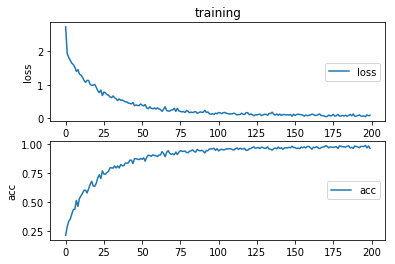

KeyError: 'val_loss'

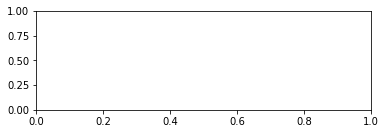

In [18]:
with open('history.pickle', mode='rb') as f:
    history = pickle.load(f)

plt.subplot(2,1,1)
plt.plot(history['loss'], "-", label="loss",)
plt.title('training')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='center right')

plt.subplot(2,1,2)
plt.plot(history['acc'], "-", label="acc",)
plt.ylabel('acc')
plt.legend(loc='center right')

plt.show()

plt.subplot(2,1,1)
plt.plot(history['val_loss'], "-", label="val_loss")
plt.title('validation')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.legend(loc='center right')
plt.subplot(2,1,2)
plt.plot(history['val_acc'], "-", label="val_acc")
plt.ylabel('val_acc')
plt.legend(loc='center right')

plt.show()

In [19]:
K.clear_session()